In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("shared/data/temperature.csv")
# rename columns
df = df.rename(columns={ 
    'Unnamed: 0': 'Country ID',
    '1': 'January',
    '2': 'February',
    '3': 'March',
    '4': 'April',
    '5': 'May',
    '6': 'June',
    '7': 'July',
    '8': 'August',
    '9': 'September',
    '10': 'October',
    '11': 'November',
    '12': 'December'})
df.head()

,Country ID,longitude,latitude,January,February,March,April,May,June,July,August,September,October,November,December
0,79669,138.75,-4.75,28.5,28.7,28.5,30.2,29.9,28.8,27.3,28.5,28.4,28.4,29.2,29.0
1,79091,136.75,-14.25,29.4,29.8,29.0,29.7,28.2,26.0,23.9,26.0,26.4,28.3,29.8,30.2
2,22723,-57.75,-19.75,28.8,29.0,28.2,25.5,23.6,22.6,24.7,25.4,26.6,27.7,28.1,28.1
3,40355,22.75,-18.25,25.7,25.6,25.6,24.9,21.3,18.0,17.7,21.0,25.1,28.7,27.7,26.1
4,17837,-71.75,-40.25,10.9,10.0,7.9,5.3,2.8,1.9,-0.2,-0.2,1.4,3.6,6.5,8.1


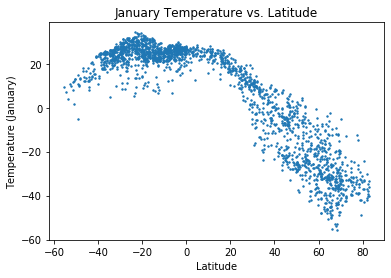

In [2]:
plt.scatter(df['latitude'], df['January'], s=2)
plt.title('January Temperature vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (January)')
plt.show()

In [3]:
print(f"January Temperature and Latitude Correlation: {round(df['January'].corr(df['latitude']), 4)}")

January Temperature and Latitude Correlation: -0.8808


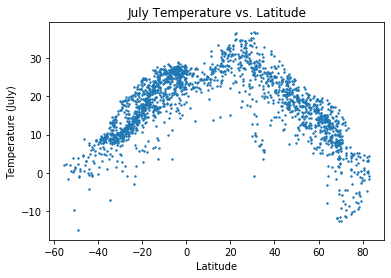

In [4]:
plt.scatter(df['latitude'], df['July'], s=2)
plt.title('July Temperature vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (July)')
plt.show()

In [5]:
print(f"July Temperature and Latitude Correlation: {round(df['July'].corr(df['latitude']), 4)}")

July Temperature and Latitude Correlation: -0.0908


It is most intuitive to think of latitude as the independent variable and temperature as the dependent variable as changes in latitude should cause rises or drops depending on the distance from the equator. 

In January, the earth's axis is tilted so that the southern hemisphere is experiencing 'summer' while the northern hemisphere experiences 'winter'. This explains the strong negative correlation (-0.8808) between temperature in January and latitude because the greater the latitude (the more northward you go), the colder the temperature. This explains the shape/pattern of the scatter plot, but it is also important to note that the highest temperature in January is around -20 latitude. This means that although temperature and latitude generally have a strong negative correlation in January, the lowest latitude value doesn't correspond with the highest temperature. This is probably due to the fact that the sun does not point directly at -60 latitude in January, but a little above. 

In July, there is a very weak, negative correlation (-0.0908) between latitude and temperature, and it is important to note that the although the month directly follows summer solstice (June 21st), it is also aligns with the earth's aphelion - the point in its orbit when it is furthest from the sun. Since July corresponds with aphelion, it could be that the greater distance from the sun causes for more moderate weather in both the northern and southern hemispheres in this month. Notice in the scatter plot that the highest temperature in july lies around 30 degrees latitude, and temperatures fall at either side creating a sort of negative parabolic shape. This is possibly due to the earth's consistent axial tilt of roughly 23.5 degrees. 

In [6]:
print(f"Latitude Min: {df['latitude'].min()}")
print(f"Latitude Max: {df['latitude'].max()}")

Latitude Min: -55.25
Latitude Max: 82.75


Based on the plot, the distribution of weather stations does not appear to be a random sample of the earth's surface. You can see that the weather stations that lie in the southern hemisphere are much more tightly packed than those which lie in the northern hemisphere. So, the samples taken from the northern hemisphere are evenly distributed and representative of the temperature, whereas the those in the southern hemisphere are not. This could be due to the lack of land at the southern extremes of earth, causing the samples taken in this hemisphere to be far more similar to each other and not representative of the actual distribution. Notice that the minimum latitude value is -55.25 while the maximum is 82.75. The locations of weather stations in the northern hemisphere reach higher up and closer to their respective pole than those in the southern hemisphere. This indicates a potentially significant sampling bias in the data set. 

The fact that the latitude range is restricted in the southern hemisphere, and therefore the southern hemisphere is underrepresented, could invalidate some of the conclusions we made earlier about latitude and temperature correlation. I believe that it particularly invalidates the strong negative correlation between latitude and temperature in January. Notice that in the graph with strong correlation, as the latitude gets more negative, the temperature gets higher. The reality is that since our data set is very limited at the southern extremity of earth, which will absolutely be colder than the less extreme geographical portions of the southern hemisphere. Since the colder areas are underrepresented, this strengthens the negative correlation, causing a very misleading measure. 

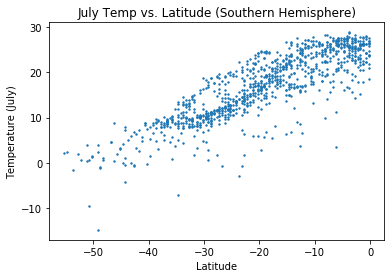

In [7]:
southern = df[df['latitude'] < 0]
plt.scatter(southern['latitude'], southern['July'], s=2)
plt.title('July Temp vs. Latitude (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (July)')
plt.show()

In [8]:
print(f"July Temp and Latitude Correlation (Southern Hemisphere): {round(southern['July'].corr(southern['latitude']), 4)}")

July Temp and Latitude Correlation (Southern Hemisphere): 0.854


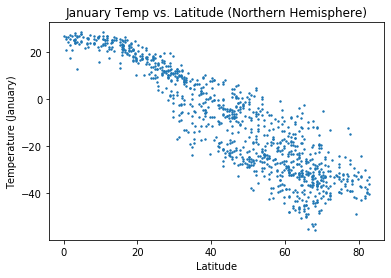

In [9]:
northern = df[df['latitude'] > 0]
plt.scatter(northern['latitude'], northern['January'], s=2)
plt.title('January Temp vs. Latitude (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (January)')
plt.show()

In [10]:
print(f"January Temp and Latitude Correlation (Northern Hemisphere): {round(northern['January'].corr(northern['latitude']), 4)}")

January Temp and Latitude Correlation (Northern Hemisphere): -0.9044


I previously found that the correlation between latitude and temperature for the southern hemisphere in July to be 0.854, while the correlation between latitude and temperature for the northern hemisphere in January is -.9044. Both of these are very strong correlations, positive and negative respectively, which is interesting especially in the case of July. In part (a), the correlation for July was calculated to be -0.0908, which represents essentially no correlation. The important point here is that latitude and temperature are in fact correlated from the perspective of each individual hemisphere during their winter months. But as we discussed in class, if I were to have concluded that there was no correlation from the calculation in part (a), that would have been an **ecological fallacy**. In other words, I would have been incorrectly using correlations based on aggregates to draw conclusions about the units that make up those aggregates. 

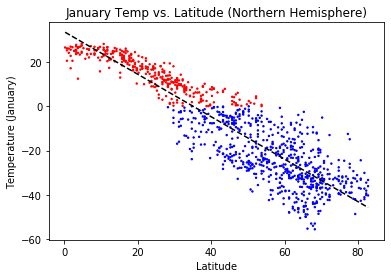

In [11]:
import statsmodels.formula.api as smf

# Make the colors different to the left and right of 0 latitude to show two different hemispheres
northern = df[df['latitude'] > 0]
colors = ['red' if temp > 0 else 'blue' for temp in northern['January']]

# Add OLS regression line using statsmodels import. Also, limit x_range to latitude min and max
mod = smf.ols(formula='January ~ latitude', data=northern).fit()
x_range = np.linspace(northern['latitude'].min(), northern['latitude'].max(), 100)
y_predicted = mod.predict(pd.DataFrame({'latitude': x_range}))
plt.plot(x_range, y_predicted, label='Fitted Line', linestyle='--', color='black')

plt.scatter(northern['latitude'], northern['January'], s=2, color=colors)
plt.title('January Temp vs. Latitude (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (January)')
plt.show()

As you can see in my comments, I made two changes to improve the visual display of the "January Temp vs. Latitude (Northern Hemisphere)" scatter plot from part. The first change was to make it so data points with temperatures below 0 degrees would be blue, and those above 0 degrees would be red. I did this by iterating through the temperatures in the january column and using inequality operators to assign a string value of 'red' or 'blue' in the colors list. Then, I set the color argument in .scatter() to the colors list. The second change was to add a regression line using Ordinary Least Squares, or .ols() from the statsmodels library (as we learned in recitation). Initially, the regression line extended much further left than the actual data, so I restricted the range of x and y accordingly using the minimum and maximum latitude values. Finally, I plotted the regression line using .plot(). This regression line is meant to help inform the observer about the general trend of the dataset. 